In [2]:
import networkx as nx
# https://networkx.github.io/documentation/stable/reference/index.html
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd

# Exploration of the graph : relational data understanding

In [3]:
# load the graph
# The graph is an extraction from LinkedIn Social Network
G = nx.read_gexf("dataset/mediumLinkedin.gexf")

In [4]:
G.number_of_nodes()

811

In [5]:
# Nb of edges
G.number_of_edges()

1597

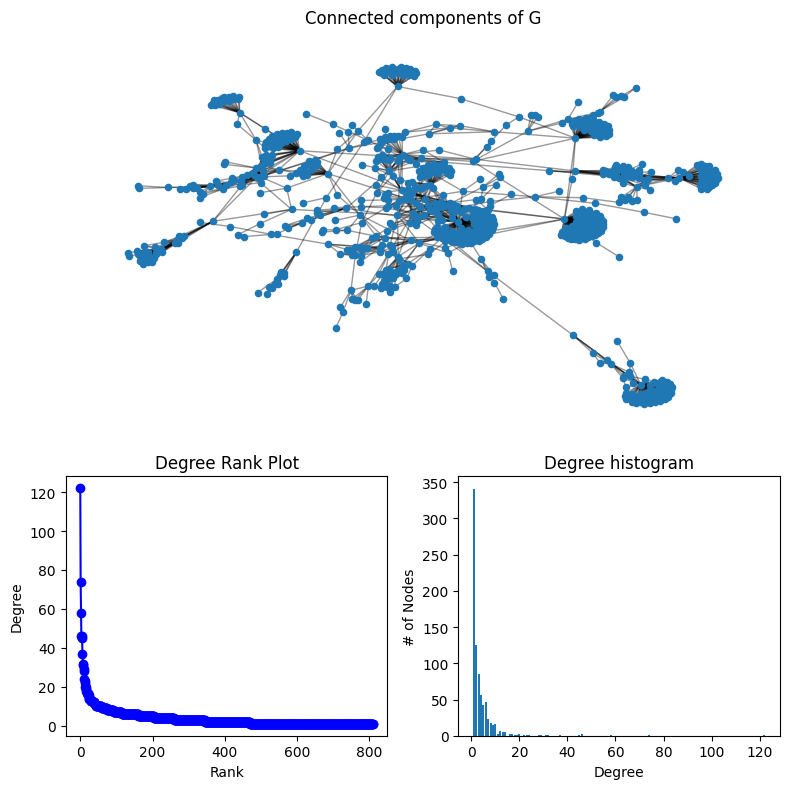

In [6]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [7]:
# Obtenez tous les noms des nœuds avec leurs attributs
node_attributes = {node: G.nodes[node] for node in G.nodes}

# Obtenez tous les noms des arêtes avec leurs attributs
edge_attributes = {(u, v): G.edges[u, v] for u, v in G.edges}

print("Attributs des nœuds :")
print(node_attributes)

print("\nAttributs des arêtes :")
print(edge_attributes)

Attributs des nœuds :
{'U27476': {'label': 'U27476'}, 'U4665': {'label': 'U4665'}, 'U1313': {'label': 'U1313'}, 'U8804': {'label': 'U8804'}, 'U14078': {'label': 'U14078'}, 'U9628': {'label': 'U9628'}, 'U9721': {'label': 'U9721'}, 'U2649': {'label': 'U2649'}, 'U27759': {'label': 'U27759'}, 'U7310': {'label': 'U7310'}, 'U22859': {'label': 'U22859'}, 'U1417': {'label': 'U1417'}, 'U25611': {'label': 'U25611'}, 'U24095': {'label': 'U24095'}, 'U3895': {'label': 'U3895'}, 'U13005': {'label': 'U13005'}, 'U2620': {'label': 'U2620'}, 'U5976': {'label': 'U5976'}, 'U4249': {'label': 'U4249'}, 'U9140': {'label': 'U9140'}, 'U16112': {'label': 'U16112'}, 'U27776': {'label': 'U27776'}, 'U27708': {'label': 'U27708'}, 'U15284': {'label': 'U15284'}, 'U24549': {'label': 'U24549'}, 'U18514': {'label': 'U18514'}, 'U15272': {'label': 'U15272'}, 'U3933': {'label': 'U3933'}, 'U15946': {'label': 'U15946'}, 'U25630': {'label': 'U25630'}, 'U25632': {'label': 'U25632'}, 'U22031': {'label': 'U22031'}, 'U11562': {'l

In [8]:
# vérifier si le graph est orienté 

if nx.is_directed(G):
    print("Le graphe est orienté.")
else:
    print("Le graphe n'est pas orienté.")

Le graphe n'est pas orienté.


In [9]:
# vérifier si le graph est pondéré

if nx.is_weighted(G):
    print("Le graphe est pondéré.")
else:
    print("Le graphe n'est pas pondéré.")

Le graphe n'est pas pondéré.


Alimentation du graphe avec les attributs 

In [15]:
df_l = pd.read_csv('dataset/location_with_60percent_of_nodes_remoded.csv', sep='\t', header='infer')
df_c = pd.read_csv('dataset/college_with_60percent_of_nodes_remoded.csv', sep='\t', header='infer')
df_e = pd.read_csv('dataset/employer_with_60percent_of_nodes_remoded.csv', sep='\t', header='infer')

In [16]:
def ajouter_attributs(graph, df_l, df_c, df_e):
    # Ajouter les attributs pour chaque nœud du graphe
    for node in graph.nodes():
        # Vérifier si le nœud a des données dans les dataframes
        if node in df_l['name'].values:
            graph.nodes[node]['location'] = df_l.loc[df_l['name'] == node, 'location'].values[0]
        if node in df_c['name'].values:
            graph.nodes[node]['college'] = df_c.loc[df_c['name'] == node, 'college'].values[0]
        if node in df_e['name'].values:
            graph.nodes[node]['employer'] = df_e.loc[df_e['name'] == node, 'employer'].values[0]

In [17]:
ajouter_attributs(G, df_l, df_c, df_e)

In [18]:
G.nodes.data()

NodeDataView({'U27476': {'label': 'U27476'}, 'U4665': {'label': 'U4665'}, 'U1313': {'label': 'U1313', 'location': 'norfolk virginia area', 'college': 'longwood university', 'employer': 'discovery education'}, 'U8804': {'label': 'U8804', 'location': 'bologna area italy', 'college': 'universit&#xe0; di bologna', 'employer': 'gruppo euris spa'}, 'U14078': {'label': 'U14078'}, 'U9628': {'label': 'U9628'}, 'U9721': {'label': 'U9721'}, 'U2649': {'label': 'U2649', 'location': 'urbana-champaign illinois area', 'college': 'shanghai university of finance and economics', 'employer': 'bocom international'}, 'U27759': {'label': 'U27759'}, 'U7310': {'label': 'U7310', 'location': 'greater seattle area', 'college': 'university of illinois at urbana-champaign', 'employer': 'microsoft'}, 'U22859': {'label': 'U22859', 'location': 'bengaluru area india', 'college': 'indian institute of technology madras', 'employer': 'amazon'}, 'U1417': {'label': 'U1417', 'location': 'baltimore maryland area', 'employer':

# Profil data understanding

In [19]:
# We use pandas dataframes to load attributes
# Nodes are characterized by a list of colleges, a list of employers, a list of location
# The order means nothing. Nothing allow us to determine the current employer...
df_e = pd.read_csv('dataset/employer_with_60percent_of_nodes_remoded.csv', sep='\t', header='infer')
df_e.head()

,name,employer
0,U1313,discovery education
1,U1313,ctb mcgraw-hill
2,U1313,university of charleston university of south c...
3,U1313,south carolina department of education
4,U1313,chesapeake va and sumter sc


In [20]:
df_l.isnull().sum()

name        0
location    0
dtype: int64

In [21]:
df_l

,name,location
0,U1313,norfolk virginia area
1,U8804,bologna area italy
2,U2649,urbana-champaign illinois area
3,U7310,greater seattle area
4,U22859,bengaluru area india
...,...,...
331,U14007,urbana-champaign illinois area
332,U15197,urbana-champaign illinois area
333,U27777,china
334,U8828,urbana-champaign illinois area


Vérification de l'unicité des valeurs 

In [22]:
# Regrouper les données par nom et compter le nombre de valeurs uniques pour chaque groupe
unique_locations = df_e.groupby('name')['employer'].nunique()

# Sélectionner les noms avec plus d'une location unique
multiple_locations = unique_locations[unique_locations > 1]

# Afficher les enregistrements des personnes avec plus d'une location unique
for name in multiple_locations.index:
    print("Enregistrements pour la personne", name, ":")
    print(df_e[df_e['name'] == name])
    print()

Enregistrements pour la personne U10051 :
       name                        employer
193  U10051                 krames staywell
194  U10051           cygnus business media
195  U10051  american academy of pediatrics

Enregistrements pour la personne U1045 :
      name              employer
156  U1045     measured progress
157  U1045    saint mary academy
158  U1045  psychometric society
159  U1045                   act

Enregistrements pour la personne U1055 :
      name                                           employer
765  U1055  graduate management admission council&#xae; (g...
766  U1055                university of massachusetts amherst
767  U1055                             republic of korea army

Enregistrements pour la personne U1068 :
      name                                           employer
204  U1068               little brothers - friends of elderly
205  U1068  leaders in business development | marketing | ...
206  U1068                              liaison internati

- Aucune personne n'a été associée à deux emplacements différents dans notre dataset.
- 11 individus ont fréquenté différentes universités.
- Plusieurs personnes ont changé de lieu de travail.  

In [23]:
df_e.groupby('name').count().describe()

,employer
count,297.000000
mean,3.107744
std,1.976682
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,13.000000


In [24]:
df_e['employer'].value_counts()

employer
university of illinois at urbana-champaign    76
google                                        15
microsoft                                     15
university of texas at austin                  5
amazon                                         5
                                              ..
new jersey department of education             1
brookings institution                          1
syrian emergency task force (setf)             1
muslim public affairs council                  1
yuhuan taijie hardware co. ltd.                1
Name: count, Length: 723, dtype: int64

In [25]:
df_c['college'].value_counts()

college
university of illinois at urbana-champaign             66
shanghai jiao tong university                          16
bangladesh university of engineering and technology    10
tsinghua university                                     9
peking university                                       6
                                                       ..
punjab engineering college                              1
northern illinois university dekalb il                  1
indian institute of technology kharagpur                1
chaitanya bharathi institute of technology.             1
huazhong university of science and technology           1
Name: count, Length: 109, dtype: int64

In [26]:
df_l['location'].value_counts()

location
urbana-champaign illinois area    92
greater chicago area              33
san francisco bay area            24
greater new york city area        16
greater boston area               16
                                  ..
iraq                               1
finland                            1
wichita kansas area                1
indianapolis indiana area          1
kuala lumpur malaysia              1
Name: count, Length: 89, dtype: int64

In [27]:
# Boolean row selection by values in a column
df_e.loc[df_e['employer'].isin(['google','google inc']),:].head()

,name,employer
30,U3895,google
126,U15289,google
136,U24080,google
145,U24046,google
161,U7151,google


In [28]:
df_c

,name,college
0,U1313,longwood university
1,U8804,universit&#xe0; di bologna
2,U2136,university of illinois at urbana-champaign
3,U6021,illinois wesleyan university
4,U7310,university of illinois at urbana-champaign
...,...,...
237,U27761,shanghai jiao tong university
238,U18562,university of florida
239,U18562,florida international university
240,U15197,university of illinois at urbana-champaign


# Strategy 0 : naive method 

In [29]:
naive_predicted_values={}

In [30]:
df_empty = pd.read_csv('dataset/empty.csv', sep='\t', header='infer')

empty = df_empty['name'].drop_duplicates().tolist()

In [31]:
df_empty

,name
0,U27476
1,U4665
2,U14078
3,U9628
4,U9721
...,...
470,U14564
471,U14112
472,U4586
473,U18520


In [32]:
from typing import Counter


def naive_method(graph, empty, df):
    """   Predict the missing attribute with a simple but effective
    relational classifier. 
    
    The assumption is that two connected nodes are 
    likely to share the same attribute value. Here we chose the most frequently
    used attribute by the neighbors
    
    Parameters
    ----------
    graph : graph
       A networkx graph
    empty : list
       The nodes with empty attributes 
    df : pandas dataframe 
       Either location, employer or college dataframe. 

    Returns
    -------
    predicted_values : dict 
       A dict of attributes, either location, employer or college attributes. 
       key is a node (from empty), value is a list of attribute values. Here 
       only 1 value in the list.
     """
    predicted_values={}
    for n in empty:
        nbrs_attr_values=[] 
        for nbr in graph.neighbors(n):
            # attribute values for the node nbr
            attr = df_l.loc[df_l.name == nbr ,'location'].values
            if attr.size > 0: #array not empty
                for val in attr:
                    nbrs_attr_values.append(val)
        predicted_values[n]=[]
        if nbrs_attr_values: # non empty list
            # count the number of occurrence each value and returns a dict
            cpt=Counter(nbrs_attr_values)
            # take the most represented attribute value among neighbors
            a,nb_occurrence=max(cpt.items(), key=lambda t: t[1])
            predicted_values[n].append(a)
    return predicted_values

naive_predicted_values = naive_method(G, empty, df_e)

In [33]:
naive_predicted_values = naive_method(G, empty, df_e)
naive_predicted_values

{'U27476': ['san francisco bay area'],
 'U4665': [],
 'U14078': ['urbana-champaign illinois area'],
 'U9628': ['urbana-champaign illinois area'],
 'U9721': ['springfield illinois area'],
 'U27759': [],
 'U24095': ['san francisco bay area'],
 'U4249': ['urbana-champaign illinois area'],
 'U27776': [],
 'U27708': [],
 'U15284': ['urbana-champaign illinois area'],
 'U24549': [],
 'U18514': ['miami fort lauderdale area'],
 'U15946': ['greater new york city area'],
 'U25630': ['greater boston area'],
 'U25632': ['greater boston area'],
 'U22031': [],
 'U7912': ['urbana-champaign illinois area'],
 'U22018': [],
 'U18925': ['urbana-champaign illinois area'],
 'U7136': [],
 'U3927': [],
 'U1381': ['greater new york city area'],
 'U22087': [],
 'U27804': [],
 'U7355': ['united states'],
 'U14024': ['urbana-champaign illinois area'],
 'U27679': [],
 'U27464': [],
 'U24259': [],
 'U18564': [],
 'U11575': ['beijing city china'],
 'U14507': ['urbana-champaign illinois area'],
 'U27477': ['beijing c

In [34]:
def evaluation_accuracy(groundtruth, pred):
    """    Compute the accuracy of your model.

     The accuracy is the proportion of true results.

    Parameters
    ----------
    groundtruth : pandas dataframe 
       Either location, employer or college dataframe. 
    pred : dict 
       A dict of attributes, either location, employer or college attributes. 
       key is a node, value is a list of attribute values. 

    Returns
    -------
    out : float
       Accuracy.
    """
    true_positive_prediction=0
    predicted=0
    for p_key, p_value in pred.items():
        attr = groundtruth.loc[groundtruth.name == p_key ,groundtruth.columns[1]].values
        # if prediction is empty, e.g. [], and so is the groundtruth
        # May happen, we count it as a true prediction
        if not p_value and attr.size == 0:
            true_positive_prediction+=1
            predicted+=1
        # counts the number of good prediction for node p_key
        # here len(p_value)=1 but we could have tried to predict more values
        # if p_value == [], we add 0
        true_positive_prediction += len([c for c in p_value if c in attr])
        predicted += len([c for c in p_value])
    return true_positive_prediction*100/predicted

In [35]:
df_l_truth = pd.read_csv('dataset/groundtruth/location.csv', sep='\t', header='infer')
df_e_truth = pd.read_csv('dataset/groundtruth/employer.csv', sep='\t', header='infer')
df_c_truth = pd.read_csv('dataset/groundtruth/college.csv', sep='\t', header='infer')

In [36]:
result=evaluation_accuracy(df_l_truth, naive_predicted_values)
print("%f%% of the predictions are true" % result)
print("Very poor result!!! Try to do better!!!!")

32.352941% of the predictions are true
Very poor result!!! Try to do better!!!!


# Strategy 1 

On va se baser sur l'homophilie (les individus ont tendance à être similaires à leurs voisins dans le réseau). 
Définition d'un voisin : 
- Des voisins appartiennent à une même communauté (même clique)
- Des voisins appartiennent à des communautés Louvain 

Méthode : Co-appartenance à des communautés
- Détecter les communautés
- Attribuer chaque noeud à une communauté de louvain 
- Sélection des attributs les plus pertinents en fonction de leur fréquence d'occurence dans la communauté
- Remplissage des valeurs manquantes en se basant sur les noeuds dans la même communauté 

In [37]:
from networkx.algorithms import community

# Identifier les communautés à l'aide de l'algorithme Louvain
communities = community.greedy_modularity_communities(G)

# Attribuer les noeuds aux différentes communautés
community_membership = {}
for idx, comm in enumerate(communities):
    for node in comm:
        community_membership[node] = idx

community_membership

{'U27648': 0,
 'U4568': 0,
 'U24092': 0,
 'U27691': 0,
 'U16137': 0,
 'U27553': 0,
 'U11566': 0,
 'U27738': 0,
 'U4625': 0,
 'U27679': 0,
 'U27642': 0,
 'U27692': 0,
 'U25559': 0,
 'U24549': 0,
 'U27498': 0,
 'U4613': 0,
 'U27761': 0,
 'U27464': 0,
 'U27687': 0,
 'U27758': 0,
 'U28774': 0,
 'U11590': 0,
 'U4655': 0,
 'U27759': 0,
 'U27804': 0,
 'U27742': 0,
 'U27604': 0,
 'U27602': 0,
 'U4635': 0,
 'U27569': 0,
 'U7967': 0,
 'U4681': 0,
 'U27494': 0,
 'U27618': 0,
 'U7256': 0,
 'U27704': 0,
 'U4610': 0,
 'U27676': 0,
 'U27708': 0,
 'U24080': 0,
 'U4680': 0,
 'U27634': 0,
 'U16078': 0,
 'U27332': 0,
 'U27300': 0,
 'U28772': 0,
 'U24504': 0,
 'U27542': 0,
 'U27791': 0,
 'U4676': 0,
 'U11597': 0,
 'U27575': 0,
 'U27784': 0,
 'U16174': 0,
 'U27283': 0,
 'U27541': 0,
 'U11563': 0,
 'U2649': 0,
 'U27763': 0,
 'U27476': 0,
 'U27752': 0,
 'U24184': 0,
 'U27748': 0,
 'U27515': 0,
 'U4630': 0,
 'U16127': 0,
 'U27663': 0,
 'U25563': 0,
 'U24064': 0,
 'U4574': 0,
 'U27608': 0,
 'U4628': 0,
 'U2404

In [38]:
# Création du DataFrame 'communities'
communities_df_l = pd.DataFrame(list(community_membership.items()), columns=['name', 'community_index'])
communities_df_c = pd.DataFrame(list(community_membership.items()), columns=['name', 'community_index'])
communities_df_e = pd.DataFrame(list(community_membership.items()), columns=['name', 'community_index'])

In [39]:
# Ajout de la colonne 'freq_location' dans 'communities'
communities_df_l['freq_location'] = communities_df_l['community_index'].apply(lambda x: Counter(df_l[df_l['name'].isin(communities[x])]['location']).most_common(1)[0][0])
communities_df_c['freq_college'] = communities_df_c['community_index'].apply(lambda x: Counter(df_c[df_c['name'].isin(communities[x])]['college']).most_common(1)[0][0])
communities_df_e['freq_employer'] = communities_df_e['community_index'].apply(lambda x: Counter(df_e[df_e['name'].isin(communities[x])]['employer']).most_common(1)[0][0])


communities_df_l

,name,community_index,freq_location
0,U27648,0,urbana-champaign illinois area
1,U4568,0,urbana-champaign illinois area
2,U24092,0,urbana-champaign illinois area
3,U27691,0,urbana-champaign illinois area
4,U16137,0,urbana-champaign illinois area
...,...,...,...
806,U24087,20,san francisco bay area
807,U24091,20,san francisco bay area
808,U2734,20,san francisco bay area
809,U24113,20,san francisco bay area


In [40]:
# Ajout de la colonne 'predicted_location' dans 'df_empty'
df_empty['location'] = df_empty['name'].apply(lambda x: communities_df_l[communities_df_l['name'] == x]['freq_location'].iloc[0])
df_empty['college'] = df_empty['name'].apply(lambda x: communities_df_c[communities_df_c['name'] == x]['freq_college'].iloc[0])
df_empty['employer'] = df_empty['name'].apply(lambda x: communities_df_e[communities_df_e['name'] == x]['freq_employer'].iloc[0])


df_empty

,name,location,college,employer
0,U27476,urbana-champaign illinois area,shanghai jiao tong university,university of illinois at urbana-champaign
1,U4665,urbana-champaign illinois area,shanghai jiao tong university,university of illinois at urbana-champaign
2,U14078,urbana-champaign illinois area,university of illinois at urbana-champaign,university of illinois at urbana-champaign
3,U9628,urbana-champaign illinois area,university of illinois at urbana-champaign,university of illinois at urbana-champaign
4,U9721,urbana-champaign illinois area,university of illinois at urbana-champaign,university of illinois at urbana-champaign
...,...,...,...,...
470,U14564,urbana-champaign illinois area,university of illinois at urbana-champaign,university of illinois at urbana-champaign
471,U14112,urbana-champaign illinois area,university of illinois at urbana-champaign,university of illinois at urbana-champaign
472,U4586,urbana-champaign illinois area,shanghai jiao tong university,university of illinois at urbana-champaign
473,U18520,miami fort lauderdale area,university of florida,ultimate software


In [41]:
location_counts = df_empty['location'].value_counts()

# Afficher le nombre d'occurrences de chaque localisation
print("Nombre d'occurrences de chaque localisation :")
print(location_counts)

Nombre d'occurrences de chaque localisation :
location
urbana-champaign illinois area    293
greater chicago area               55
greater boston area                48
san francisco bay area             18
bangladesh                         17
hyderabad area india               14
miami fort lauderdale area         13
china                              11
greater new york city area          6
Name: count, dtype: int64


In [42]:
location_counts = df_l['location'].value_counts()

# Afficher le nombre d'occurrences de chaque localisation
print("Nombre d'occurrences de chaque localisation :")
print(location_counts)

Nombre d'occurrences de chaque localisation :
location
urbana-champaign illinois area    92
greater chicago area              33
san francisco bay area            24
greater new york city area        16
greater boston area               16
                                  ..
iraq                               1
finland                            1
wichita kansas area                1
indianapolis indiana area          1
kuala lumpur malaysia              1
Name: count, Length: 89, dtype: int64


In [43]:
location_counts = df_l_truth['location'].value_counts()

# Afficher le nombre d'occurrences de chaque localisation
print("Nombre d'occurrences de chaque localisation :")
print(location_counts)

Nombre d'occurrences de chaque localisation :
location
urbana-champaign illinois area               224
san francisco bay area                        79
greater chicago area                          68
greater new york city area                    36
china                                         30
                                            ... 
ncr - national capital region philippines      1
salinas california area                        1
ulm area germany                               1
mannheim area germany                          1
las vegas nevada area                          1
Name: count, Length: 135, dtype: int64


In [44]:
# Group locations by name and filter unique values
grouped_location = df_empty.groupby('name')['location'].apply(lambda x: list(set(x))).to_dict()
grouped_college = df_empty.groupby('name')['college'].apply(lambda x: list(set(x))).to_dict()
grouped_employer = df_empty.groupby('name')['employer'].apply(lambda x: list(set(x))).to_dict()

grouped_employer

{'U10050': ['university of illinois at urbana-champaign'],
 'U10059': ['university of illinois at urbana-champaign'],
 'U10062': ['university of illinois at urbana-champaign'],
 'U10068': ['university of illinois at urbana-champaign'],
 'U1044': ['measured progress'],
 'U1047': ['measured progress'],
 'U10607': ['measured progress'],
 'U10618': ['measured progress'],
 'U10637': ['measured progress'],
 'U1072': ['measured progress'],
 'U1073': ['measured progress'],
 'U1075': ['measured progress'],
 'U1119': ['measured progress'],
 'U1141': ['measured progress'],
 'U11558': ['microsoft'],
 'U11559': ['university of illinois at urbana-champaign'],
 'U11566': ['university of illinois at urbana-champaign'],
 'U11575': ['microsoft'],
 'U11580': ['microsoft'],
 'U11587': ['university of illinois at urbana-champaign'],
 'U11590': ['university of illinois at urbana-champaign'],
 'U1174': ['measured progress'],
 'U11815': ['university of illinois at urbana-champaign'],
 'U11817': ['university o

In [45]:
result_location=evaluation_accuracy(df_l_truth, grouped_location)
result_employer=evaluation_accuracy(df_e_truth, grouped_employer)
result_college=evaluation_accuracy(df_c_truth, grouped_college)

print("%f%% of the location predictions are true" % result_location)
print("%f%% of the employer predictions are true" % result_employer)
print("%f%% of the college predictions are true" % result_college)

30.526316% of the location predictions are true
25.263158% of the employer predictions are true
24.421053% of the college predictions are true


# Strategy 2

Nous allons utiliser une approche de Machine Learning, en particulier le modèle RandomForest (RF), pour prédire les données manquantes. Voici comment nous allons procéder :
- Calcul de la matrice d'adjacence pour avoir les connexions entre noeuds (individus).
- Entrainement du modèle.
- Prédiction des données manquantes (location, employer, college).
- Optimisation des performances du modèle pour un résultat meilleur.

In [46]:
# calcul de la matrice d'adjacence du graphe
adjacency_matrix = nx.adjacency_matrix(G)

# Convertir la matrice d'adjacence en un tableau NumPy
adjacency_array = adjacency_matrix.toarray()

node_adjacency_dict = {}

for node in G.nodes:
    # Obtenir l'indice de la ligne correspondant au nœud dans la matrice d'adjacence
    row_index = list(G.nodes()).index(node)
    # Obtenir la ligne correspondante de la matrice d'adjacence
    adjacency_row = adjacency_array[row_index]
    # Stocker la ligne dans le dictionnaire
    node_adjacency_dict[node] = adjacency_row
    

In [47]:
# Initialiser deux listes pour stocker les clés et les valeurs

adjacency_rows = []
location_values = []

# Parcourir les nœuds du graphe
for node in G.nodes:
    # Vérifier si le nœud est présent dans df_l
    if node in df_l['name'].values:
        # Récupérer l'indice de la ligne correspondante dans df_l
        row_index = df_l[df_l['name'] == node].index[0]
        # Récupérer la ligne d'adjacence du nœud
        adjacency_row = node_adjacency_dict[node]
        # Récupérer la valeur de la colonne 'location' à l'indice row_index
        location_value = df_l.iloc[row_index]['location']
        # Ajouter la clé et la valeur aux listes
        adjacency_rows.append(adjacency_row)
        location_values.append(location_value)

adjacency_rows_array = np.array(adjacency_rows)
location_values_array = np.array(location_values)

uadjacency_rows = []
unodes = []

for node in G.nodes:
    # Vérifier si le nœud est présent dans df_l
    if node not in df_l['name'].values:
        # Récupérer la ligne d'adjacence du nœud
        uadjacency_row = node_adjacency_dict[node]
        # Récupérer la valeur de la colonne 'location' à l'indice row_index
        # Ajouter la clé et la valeur aux listes
        uadjacency_rows.append(uadjacency_row)
        unodes.append(node)

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(n_estimators=200)
clf_forest.fit(adjacency_rows_array, location_values_array)
y_pred = clf_forest.predict(np.array(uadjacency_rows))

In [49]:
# Définir les hyperparamètres à tester
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {

    'n_estimators': [4000,8000],
    'max_depth': [None, 40,80],
    'min_samples_split': [5],
    'min_samples_leaf': [1 ]}
# Initialiser le classifieur RandomForestClassifier
clf_forest = RandomForestClassifier()

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(clf_forest, param_grid, cv=5, n_jobs=-1)
grid_search.fit(adjacency_rows_array, location_values_array)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le modèle avec les meilleurs paramètres pour prédire
best_forest = grid_search.best_estimator_
y_pred = best_forest.predict(np.array(uadjacency_rows))

C:\Users\souma\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Meilleurs paramètres: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 4000}


In [50]:
predicted_locations_dict = {}

for node, pred_value in zip(unodes, y_pred):
    predicted_locations_dict[node] = [pred_value]

# Créer un nouveau dictionnaire avec les clés dans l'ordre de la liste empty
predicted_locations_dict = {name: predicted_locations_dict[name] for name in empty}


print(predicted_locations_dict)

{'U27476': ['greater san diego area'], 'U4665': ['urbana-champaign illinois area'], 'U14078': ['urbana-champaign illinois area'], 'U9628': ['urbana-champaign illinois area'], 'U9721': ['urbana-champaign illinois area'], 'U27759': ['urbana-champaign illinois area'], 'U24095': ['urbana-champaign illinois area'], 'U4249': ['urbana-champaign illinois area'], 'U27776': ['urbana-champaign illinois area'], 'U27708': ['urbana-champaign illinois area'], 'U15284': ['urbana-champaign illinois area'], 'U24549': ['urbana-champaign illinois area'], 'U18514': ['miami fort lauderdale area'], 'U15946': ['greater new york city area'], 'U25630': ['greater boston area'], 'U25632': ['greater new york city area'], 'U22031': ['urbana-champaign illinois area'], 'U7912': ['urbana-champaign illinois area'], 'U22018': ['urbana-champaign illinois area'], 'U18925': ['urbana-champaign illinois area'], 'U7136': ['urbana-champaign illinois area'], 'U3927': ['urbana-champaign illinois area'], 'U1381': ['urbana-champai

In [51]:
acc_location = evaluation_accuracy(df_l_truth,predicted_locations_dict)
print("%f%% of the location predictions are true" % acc_location)

31.789474% of the location predictions are true


# FINDING INFLUENCERS

Dans cette deuxième partie nous utiliserons le jeu de données réel pour ne pas biaiser la suite des résultats.

In [52]:
# Calculer la centralité degré du graphe G
degree_centrality = nx.centrality.degree_centrality(G)

# Trier la centralité degré et obtenir les 70 premiers éléments (pour être sûr d'avoir les 5 premiers de la ville souhaitée)
top_nodes = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:70]

results_with_location = []

# Compter le nombre de résultats de 'san francisco bay area'
count_sf_bay_area = 0

# Pour chaque nœud et sa centralité dans les 70 premiers
for node, centrality in top_nodes:
    # Trouve la ville correspondante dans le DataFrame df_ltrue en utilisant le nom de la ville
    city_info = df_l_truth[df_l_truth['name'] == node]
    
    # Si la ville correspond à 'san francisco bay area', ajouter les informations à la liste finale
    if not city_info.empty and city_info['location'].iloc[0] == 'san francisco bay area':
        results_with_location.append((node, centrality, 'san francisco bay area'))
        count_sf_bay_area += 1
        
        # Si le nombre d'éléments de 'san francisco bay area' atteint 5, sortir de la boucle
        if count_sf_bay_area == 5:
            break

for result in results_with_location:
    print(result)

('U8670', 0.056790123456790124, 'san francisco bay area')
('U15267', 0.03950617283950617, 'san francisco bay area')
('U24045', 0.02962962962962963, 'san francisco bay area')
('U4568', 0.01728395061728395, 'san francisco bay area')
('U27661', 0.011111111111111112, 'san francisco bay area')


In [53]:
# Extrair les nœuds de results_with_location
nodes_sf_bay_area = [result[0] for result in results_with_location]

# Calculer le degré de chaque nœud dans le graphe G
degree_sf_bay_area = G.degree(nodes_sf_bay_area)

# Trier les degrés et obtenir les 5 premiers
top_degree_sf_bay_area = sorted(degree_sf_bay_area, key=lambda item: item[1], reverse=True)[:5]

# Afficher les nœuds avec leur degré
for node, degree in top_degree_sf_bay_area:
    print(node, degree)


U8670 46
U15267 32
U24045 24
U4568 14
U27661 9


In [54]:
# Calculer la centralité de proximité du graphe G
closeness_centrality = nx.centrality.closeness_centrality(G)

# Trier la centralité de proximité et obtenir les 70 premiers éléments (pour être sûr d'avoir les 5 premiers de la ville souhaitée)
top_nodes = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:70]

results_with_location = []

# Compter le nombre de résultats de 'san francisco bay area'
count_sf_bay_area = 0

# Pour chaque nœud et sa centralité dans les 70 premiers
for node, centrality in top_nodes:
    # Trouve la ville correspondante dans le DataFrame df_ltrue en utilisant le nom de la ville
    city_info = df_l_truth[df_l_truth['name'] == node]
    
    # Si la ville correspond à 'san francisco bay area', ajouter les informations à la liste finale
    if not city_info.empty and city_info['location'].iloc[0] == 'san francisco bay area':
        results_with_location.append((node, centrality, 'san francisco bay area'))
        count_sf_bay_area += 1
        
        # Si le nombre d'éléments de 'san francisco bay area' atteint 5, sortir de la boucle
        if count_sf_bay_area == 5:
            break

# Afficher les résultats avec le nom de la ville
for result in results_with_location:
    print(result)

('U4568', 0.23189235614085313, 'san francisco bay area')
('U7202', 0.22959183673469388, 'san francisco bay area')
('U24045', 0.22810475922275417, 'san francisco bay area')
('U8670', 0.2162883845126836, 'san francisco bay area')
('U2627', 0.2131578947368421, 'san francisco bay area')


In [55]:
# Calculer la centralité de vecteur propre du graphe G
eigenvector_centrality = nx.centrality.eigenvector_centrality(G)

# Trier la centralité de vecteur propre et obtenir les 10 premiers éléments
top_nodes = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:40]

# Créer une liste pour stocker les résultats avec les informations de la ville
results_with_location = []

# Pour chaque nœud et sa centralité dans les 10 premiers
for node, centrality in top_nodes:
    # Trouve la ville correspondante dans le DataFrame df_ltrue en utilisant le nom de la ville
    city_info = df_l_truth[df_l_truth['name'] == node]
    
    # Si la ville correspond à 'san francisco bay area', ajouter les informations à la liste finale
    if not city_info.empty and city_info['location'].iloc[0] == 'san francisco bay area':
        results_with_location.append((node, centrality, 'san francisco bay area'))

# Afficher les résultats avec le nom de la ville
for result in results_with_location:
    print(result)


('U24045', 0.22040575754968939, 'san francisco bay area')
('U4568', 0.09534485924225651, 'san francisco bay area')
('U27661', 0.08269443436068137, 'san francisco bay area')
('U24064', 0.06566753060774416, 'san francisco bay area')
('U27460', 0.06389285125922221, 'san francisco bay area')
('U27613', 0.06389285125922221, 'san francisco bay area')


In [56]:
# Calculer la centralité d'intermédiarité du graphe G
betweenness_centrality = nx.centrality.betweenness_centrality(G)

# Trier la centralité d'intermédiarité et obtenir les 70 premiers éléments (pour être sûr d'avoir les 8 premiers)
top_nodes = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:70]

results_with_location = []

count_sf_bay_area = 0

# Pour chaque nœud et sa centralité dans les 70 premiers
for node, centrality in top_nodes:
    # Trouver la ville correspondante dans le DataFrame df_ltrue en utilisant le nom de la ville
    city_info = df_l_truth[df_l_truth['name'] == node]
    
    # Si la ville correspond à 'san francisco bay area', ajouter les informations à la liste finale
    if not city_info.empty and city_info['location'].iloc[0] == 'san francisco bay area':
        results_with_location.append((node, centrality, 'san francisco bay area'))
        count_sf_bay_area += 1
        
        # Si le nombre d'éléments de 'san francisco bay area' atteint 5, sortir de la boucle
        if count_sf_bay_area == 5:
            break

# Affiche les résultats avec le nom de la ville
for result in results_with_location:
    print(result)

('U8670', 0.1717989971049202, 'san francisco bay area')
('U4568', 0.12609941543882514, 'san francisco bay area')
('U14577', 0.10704019884151286, 'san francisco bay area')
('U7202', 0.0918985923399476, 'san francisco bay area')
('U15267', 0.05102962047337749, 'san francisco bay area')
